<img src="AIM.png" width="400">


# <center> Improving the Price Optimization Model for Nomis Solutions and E-Car's Data. <br><br><br><br>
    
<center>In Partial Fulfillment of the Requirements for <br>
<center>Machine Learning 1<br><br><br><br>
    
<center>Submitted By:

<center>Apeles, <br>
<center>Dela Cruz,<br>
<center>Hwang,<br>
<center>Nigam,<br>
<center>Palomaria,<br>
<center>Vargas<br><br><br><br>
<center>Date: 4 August 2020

# Abstract

Nomis Solutions has closed an initial deal with e-Car, an online auto loan company, to provide price optimization solutions and suggest new rates that will help maximize e-Car’s profits. A dataset containing over 200,000 records which includes the outcome of loan applications from 2002 to 2004 was provided to Nomis Solutions by e-Car and was used in this study. This study implements a price optimization methodology which considers demand, price sensitivity, and risk. Nomis Solutions can present to e-Car this methodology that achieves over a 90% increase in e-Car’s revenue and potentially close a larger deal with e-Car.

# Introduction

Nomis Solutions has been tasked by e-Car’s CEO, an online auto loan company, to help e-Car optimize its current loan rates and maximize its profits. This current offer of e-Car to Nomis Solutions was just an initial deal to prepare a business case that will be used to convince e-Car’s board of directors and potentially, close a much larger deal. A dataset containing loan application outcomes has been provided to Nomis Solutions by e-Car.

The aim of this study is to provide a price optimization methodology that Nomis Solutions can present to e-Car’s board of directors.


# Data Description

The dataset contains 208,085 records of loan application outcomes from July 01, 2002 up to November 16, 2004. The dataset contains the following detailed information:

- Tier 
-- e-Car segmentation based on FICO scores
- FICO -- FICO score
- Approved Date -- Approval date of loan
- Term -- Number of months for loan payment
- Amount -- Loan amount in USD
- Previous Rate -- Previous annual percentage rate approved for the applicant
- Car Type -- Type of financing applied (New Car, Used Car, Refinancing)
- Competition Rate -- Published Rate of Competitor
- Rate -- Annual percentage rate offered by e-Car
- Outcome -- Indicator if customer signed the loan
- Cost of Funds -- Cost of Funding Loan for e-Car
- Partner -- e-Car categorization based on its funding partners 


# Assumptions

1. One price rating scheme will be implemented using the 3 years of data.
2. No negotiation can be done after rate has been provided by e-Car.
3. All "lost" customers deferred to competition rates.
4. Customers make decisions based on rates only.
5. When costlier rates are preferred by the customer, it is assumed that the competitor was not visible to the customer.
6. The existing segmentation of e-car will be used in price optimization.

# Workflow
### > Exploratory Data Analysis
The dataset will be explored first to check for trends that may affect succeeding analysis.
### > Searching for Potential Pricing Errors
Since this study is about price optimization, the existing pricing technique will be scrutinized for potential pricing errorss.
### > Segmentation
To make the analysis more manageable, segmentation will be done before price optimization.
### > Price Optimization
Maximizing profit is the main goal of this study and this will be done through price optimization.

## Preliminaries

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit, minimize
from scipy import stats
np.set_printoptions(precision=3, suppress=True)
pd.set_option('display.float_format', '{:,.3f}'.format)
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,5)

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click
 here to toggle on/off the raw code."></form>''')

### Viewing the data

In [3]:
df = pd.read_excel('NomisB.xlsx')
df.sample(5)

,Tier,FICO,Approve Date,Term,Amount,Previous Rate,Car Type,Competition rate,Outcome,Rate,Cost of Funds,Partner Bin
33641,1,771,2004-04-24,60,"18,650.000",,N,4.190,1,3.990,1.100,1
60710,1,733,2002-10-29,60,"36,000.000",,N,4.990,0,4.890,1.790,1
91171,2,714,2003-04-21,48,"26,389.000",,N,4.490,0,4.350,1.320,3
41387,1,734,2004-08-31,36,"18,000.000",7.450,R,4.990,1,4.990,1.670,1
33397,3,716,2004-04-21,66,"10,640.100",,U,5.290,1,6.690,1.100,1


The DataFrame above displays the first five rows of the dataset.

In [4]:
df.dtypes

Tier                         int64
FICO                         int64
Approve Date        datetime64[ns]
Term                         int64
Amount                     float64
Previous Rate               object
Car  Type                   object
Competition rate           float64
Outcome                      int64
Rate                       float64
Cost of Funds              float64
Partner Bin                  int64
dtype: object

The dataset contains integer (int64), float (float64), data (datetime64[ns]), and string (object) values.

In [5]:
df.describe()

,Tier,FICO,Term,Amount,Competition rate,Outcome,Rate,Cost of Funds,Partner Bin
count,"208,085.000","208,085.000","208,085.000","208,085.000","208,085.000","208,085.000","208,085.000","208,085.000","208,085.000"
mean,1.927,726.731,56.809,"26,009.516",4.807,0.220,5.623,1.329,2.030
std,1.051,44.784,11.204,"11,108.799",0.586,0.414,1.547,0.278,0.911
min,1.000,587.000,36.000,5.000,2.990,0.000,2.450,1.020,1.000
25%,1.000,692.000,48.000,"17,800.000",4.390,0.000,4.490,1.110,1.000
50%,2.000,726.000,60.000,"25,000.000",4.790,0.000,5.090,1.262,2.000
75%,3.000,762.000,60.000,"33,000.000",5.190,0.000,6.390,1.419,3.000
max,4.000,854.000,72.000,"100,000.000",6.450,1.000,15.530,2.127,3.000


The DataFrame above displays the mean, standard deviation, minimum value, 25th percentile, 50th percentile, 75th percentile, and maximum values of each numerical variable.

In [6]:
print('# of Empty cells = ',len(df[df['Previous Rate'] == ' ']))
df.isna().sum()

# of Empty cells =  160867


Tier                0
FICO                0
Approve Date        0
Term                0
Amount              0
Previous Rate       8
Car  Type           0
Competition rate    0
Outcome             0
Rate                0
Cost of Funds       0
Partner Bin         0
dtype: int64

The dataset contains 160,867 empty cells (blank strings) and 8 missing values in the Previous Rate column.

In [7]:
# Filling empty and nan values in Previous Rate column with current rates
df.loc[df['Previous Rate']==' ', 'Previous Rate']=df.Rate
df['Previous Rate'] = df['Previous Rate'].astype('float')
df['Previous Rate'].fillna(df.Rate, inplace=True)
df.sample(5)

,Tier,FICO,Approve Date,Term,Amount,Previous Rate,Car Type,Competition rate,Outcome,Rate,Cost of Funds,Partner Bin
185252,1,734,2004-07-08,60,"45,000.000",4.490,N,4.490,0,4.490,1.363,3
44247,1,766,2004-10-18,48,"13,629.020",18.420,R,5.490,1,5.490,1.910,2
195316,1,793,2004-09-07,36,"17,500.000",4.390,U,4.390,0,4.390,1.738,3
49490,4,667,2002-07-27,60,"30,000.000",7.990,N,5.490,0,7.990,1.810,3
132610,3,818,2003-09-22,72,"34,325.000",4.950,N,4.990,0,4.950,1.120,3


The empty cells (blank strings) and missing values in the Previous Rate column were filled using the current rates.

## Exploratory Data Analysis

In [8]:
# Replacing categorical data with numerical data
df1 = df.copy()
loan_num = {'N':1, 'R':2, 'U':3}
df1['loan_num'] = [loan_num[i] for i in df1['Car  Type']]

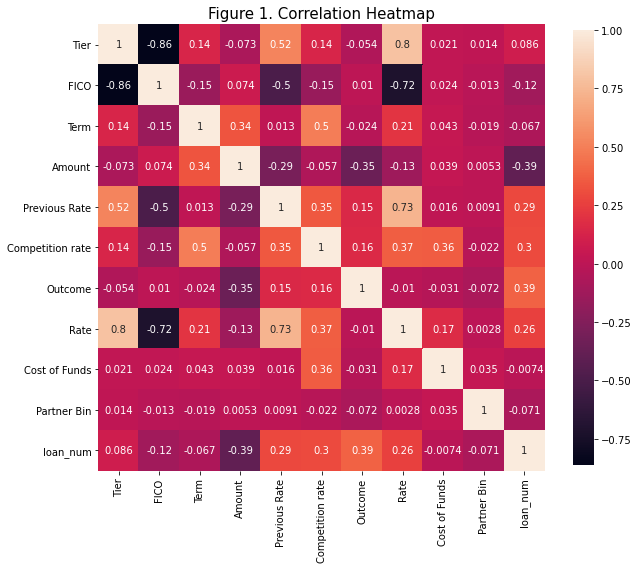

In [9]:
# Correlation Heatmap
plt.figure(figsize=(10,10))
plt.title('Figure 1. Correlation Heatmap', size=15)
sns.heatmap(df1.corr(), annot=True, square=True, cbar_kws={"shrink": 0.8});
plt.savefig('corr_heatmap.png', bbox_inches = 'tight')

As expected, there are strong negative correlations with the Tier-FICO and FICO-Rate pairs since the tier segmentation is based on FICO scores and rates are based on risk which is indicated by the FICO scores.

Since tier segmentation and the rates are based on FICO scores, Tier and Rate have a strong positive correlation.

Also since empty cells of Previous Rate were filled with Rate values, they also have a strong positive correlation.

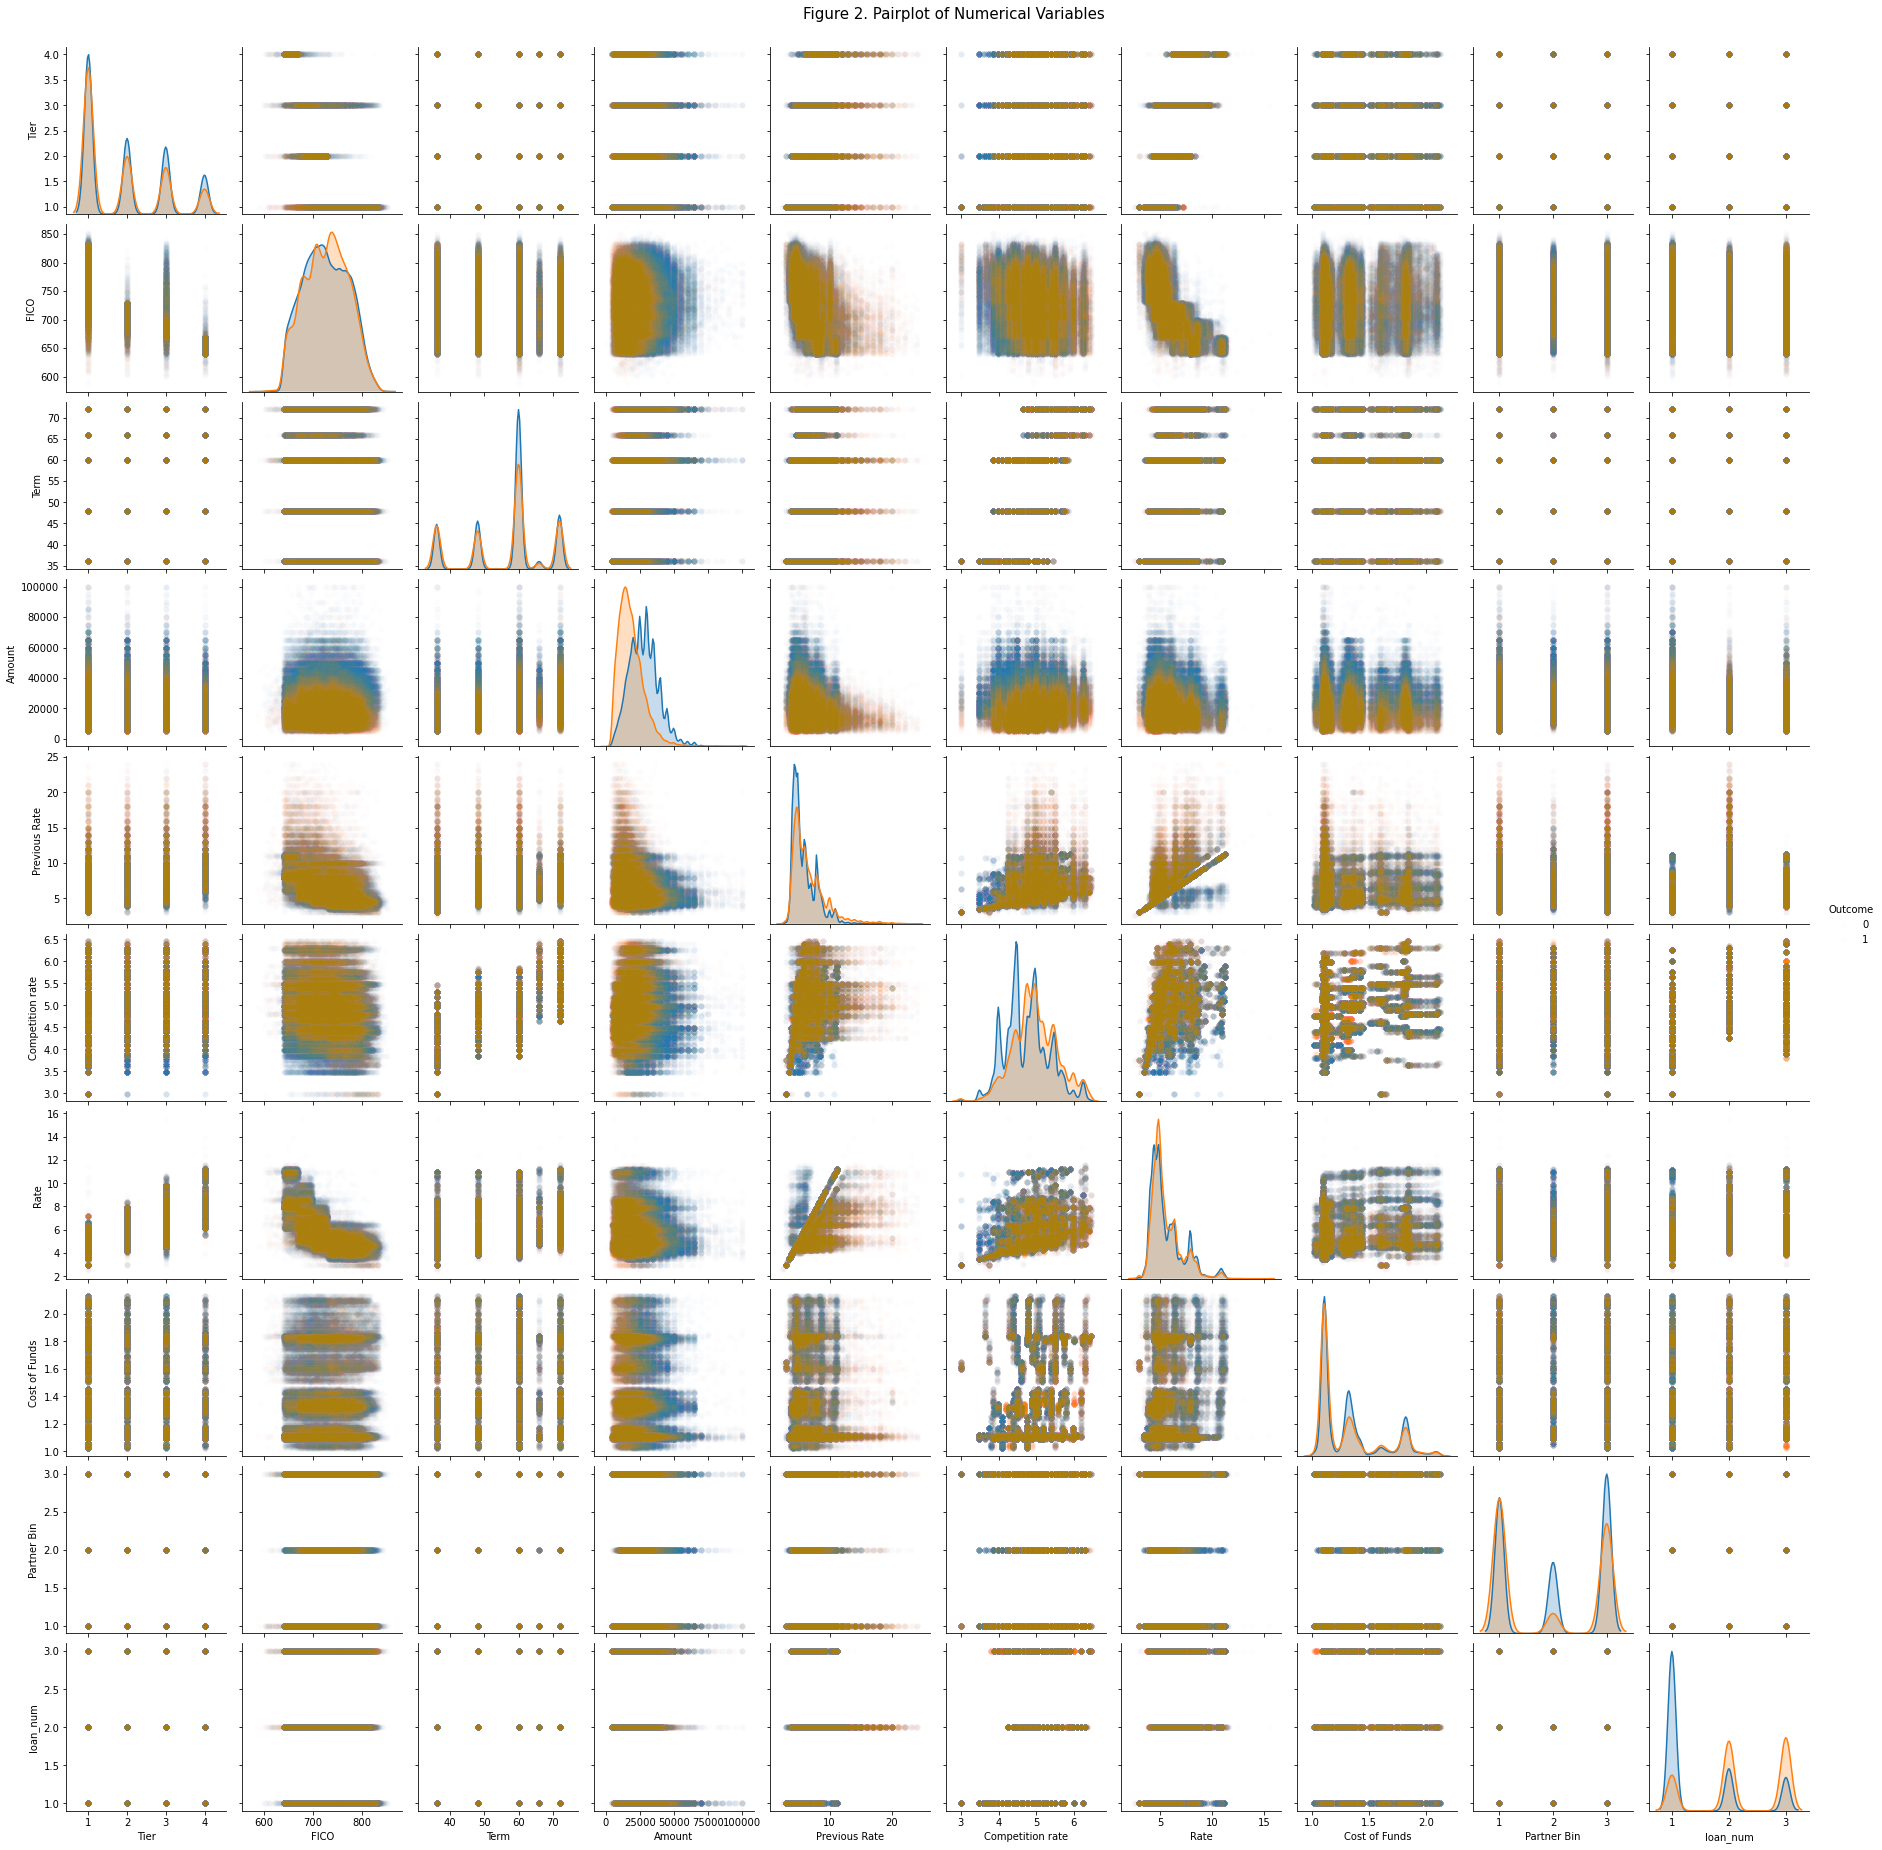

In [10]:
# Comparing Each variable by Outcome
sns.pairplot(df1, hue='Outcome', plot_kws={'alpha': 0.01})
plt.suptitle("Figure 2. Pairplot of Numerical Variables", size=15, y=1.02);

The plot above provides the pairwise relationship for each numeric feature pair.

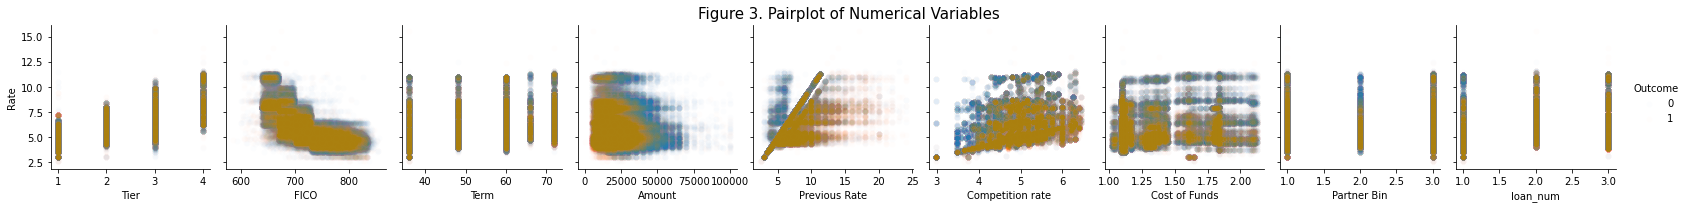

In [11]:
# Comparing variables to Rate
sns.pairplot(data = df1, hue='Outcome', y_vars=['Rate'],
             x_vars=['Tier', 'FICO', 'Term', 'Amount', 'Previous Rate',
           'Competition rate', 'Cost of Funds', 'Partner Bin', 'loan_num'],
            plot_kws={'alpha': 0.01})
plt.suptitle("Figure 3. Pairplot of Numerical Variables", size=15, y=1.08);

Since Rate is the main concern of the study, its pairwise relationship plot with the other numeric variables was isolated.

Based on the Rate and Amount pairplot, higher loan amounts have a tendency of not being accepted by customers.

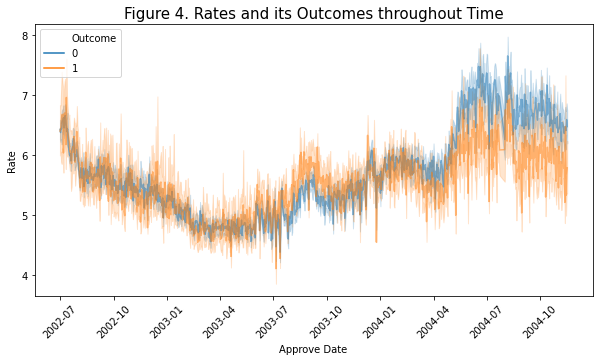

In [12]:
# Looking at the trend of the rates.
df2 = df1.copy()
df2.index = pd.to_datetime(df2['Approve Date'], dayfirst=True)

sns.lineplot(y=df2.Rate, x=df2.index, hue=df2.Outcome, alpha=0.5)
plt.xticks(rotation=45)
plt.title('Figure 4. Rates and its Outcomes throughout Time', size=15);

From around July 2002 to April 2003, the rates with outcome 1 (signed by applicant) and 0 (not signed by applicant) were mixed together.

Surprisingly, from around May 2003 to January 2004, the higher rates had an outcome of 1 while the lower rates had an outcome of 0.

As expected, higher rates got an outcome of 0 while lower rates got an outcome of 1, from around February 2004 onwards.

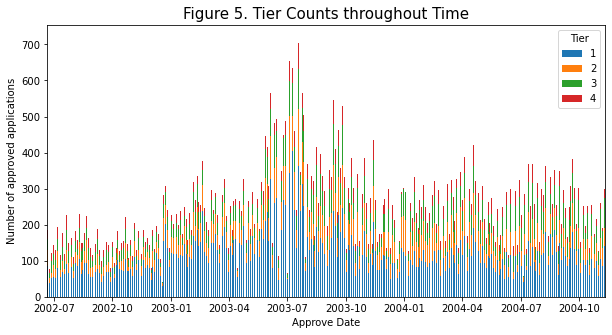

In [13]:
#Tier
data = df1.pivot_table(index='Approve Date', values='Rate',
                        columns='Tier', aggfunc='count')
data.index = data.index.astype(str).str[:7]
data.plot(kind='bar', stacked=True)
plt.xticks(ticks=np.arange(10, 860, 90),
           labels=data.index[np.arange(10, 860, 90)],
           rotation=0)
plt.ylabel('Number of approved applications')
plt.title('Figure 5. Tier Counts throughout Time', size=15);

Throughout 2002 to 2004, the loan applications were mostly composed of Tier 1 loans. Since FICO and Tier are negatively correlated, this means that e-Car is approving more less risky loan applications.

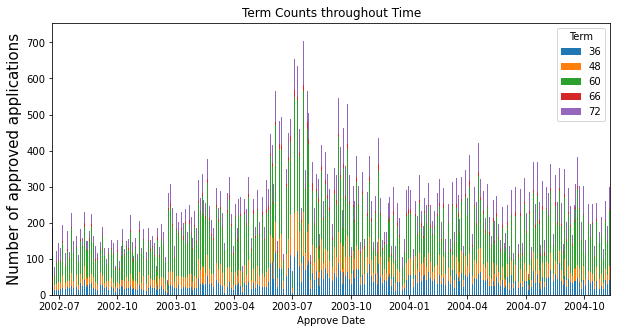

In [14]:
#Term
data = df1.pivot_table(index='Approve Date', values='Rate',
                        columns='Term', aggfunc='count')
data.index = data.index.astype(str).str[:7]
data.plot(kind='bar', stacked=True)
plt.xticks(ticks=np.arange(10, 860, 90),
           labels=data.index[np.arange(10, 860, 90)],
           rotation=0)
plt.title('Term Counts throughout Time')
plt.ylabel('Number of approved applications', size=15);

In the span of three years, the loan applications were mostly 60-month terms.

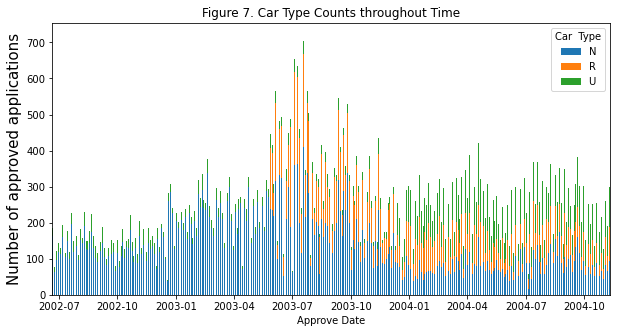

In [15]:
#Car Type
data = df1.pivot_table(index='Approve Date', values='Rate',
                        columns='Car  Type', aggfunc='count')
data.index = data.index.astype(str).str[:7]
data.plot(kind='bar', stacked=True)
plt.xticks(ticks=np.arange(10, 860, 90),
           labels=data.index[np.arange(10, 860, 90)],
           rotation=0)
plt.title('Figure 7. Car Type Counts throughout Time')
plt.ylabel('Number of approved applications', size=15);

Throughout 2002 to 2004, the loan applications were mostly for new car financing. Refinancing loans surfaced at around 2003. This could suggest that e-Car has been more approving in a wider variety of loan types during that time. This could also explain the peak in number of approved applications on 2003.

# Pricing Errors

- How will you show that the current pricing technique contains "pricing errors"?
- How do we know that there are "pricing errors"?  What are we trying to maximize in this project?

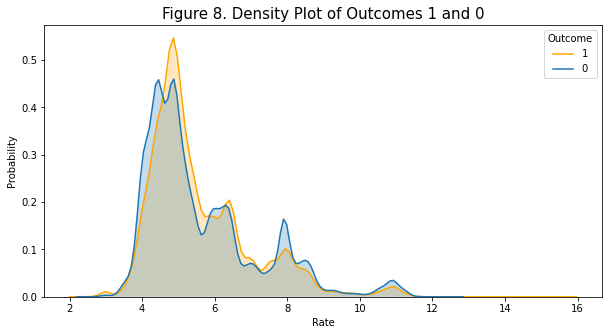

In [16]:
sns.kdeplot(df[df['Outcome']==1]['Rate'], color='orange', shade=True,
            legend=False)
sns.kdeplot(df[df['Outcome']==0]['Rate'], shade=True, legend=False)
plt.legend([1, 0], title='Outcome');
plt.title('Figure 8. Density Plot of Outcomes 1 and 0', size=15)
plt.ylabel('Probability')
plt.xlabel('Rate');

Outcomes 1 and 0 generally have the same rates.

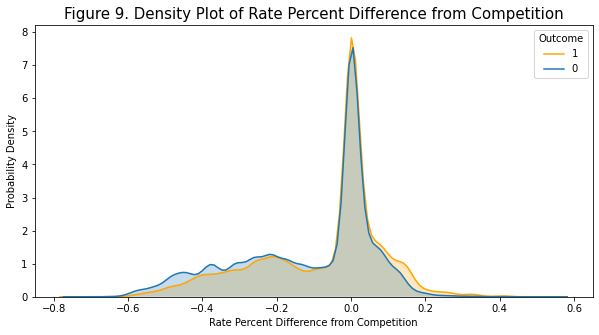

In [17]:
# Plotting the difference between competition and e-car loan rates.
df['Rate_diff_percent']=(df['Competition rate']-df['Rate'])/df['Rate']

sns.kdeplot(df[df['Outcome']==1]['Rate_diff_percent'], color='orange',
            shade=True, legend=False);
sns.kdeplot(df[df['Outcome']==0]['Rate_diff_percent'], shade=True,
            legend=False);
plt.legend([1, 0], title='Outcome');
plt.title('Figure 9. Density Plot of Rate Percent Difference from Competition'
          , size=15);
plt.ylabel('Probability Density');
plt.xlabel('Rate Percent Difference from Competition');

In [18]:
# Marking transactions with rates lesser than competition rates
df['cheap'] = df['Competition rate']>=df.Rate
accept_cheap = round(df[df['cheap']]['Outcome'].mean()*100, 2)
print(f'When e-Cars is not cheaper than competition rate, there is a ' 
      f'{100-accept_cheap} probability that e-Car will lose the customer.')

# Marking transactions with rates lesser than competition rates
df['expensive'] = df['Competition rate']<df.Rate
accept_expensive = round(df[df['expensive']]['Outcome'].mean()*100, 2)
print(f'When e-Car is more expensive than competition rate, there is a '
      f'{accept_expensive} probability that e-Car will win the customer.')

When e-Cars is not cheaper than competition rate, there is a 75.36 probability that e-Car will lose the customer.
When e-Car is more expensive than competition rate, there is a 19.11 probability that e-Car will win the customer.


The probability computations above suggest that customers may prefer cheaper or costlier rates because of other factors. It will be assumed that these other factors cannot be controlled. Only the rates can be controlled.

Since the current pricing technique already involves segmentation, the problem lies in the rates being offered to each segment which is where there price optimization will come in.

Another potential problem in the pricing technique is the disregard for the loan-to-value ratio. Loan to value is one of the key risk factors that lenders consider when qualifying borrowers for a loan. The risk of default is always at the forefront of lending decisions, and the likelihood of a lender absorbing a loss increases as the amount of equity decreases.

It is also desired to maximize the net interest profit. That is the interest gained from the borrower after subtracting the cost of funds to be paid to the partner.

# Segmentation
- How can we make the analysis more manageable? Should we segment the customers?

Pricing segment s_ijk is defined as a unique combination of product characteristics, customer characteristics and channels [1]. It is imperative to classify the data into different pricing segments due to following reasons:
- Pricing errors are identified for a specific pricing segment.
- The optimum rates vary across different segments.
- The bid-response function of a customer varies across different pricing segments.
<br>

In this study, a segment s_ijk is given by a unique combination of loan type $(i)$, tier $(j)$ and loan term $(k)$. Loan type is a classification whether the loan is being applied for a new car, used or refinanced one. In this study, loan type is given by nominal classification: $k \in [1, 2, 3] \rightarrow \text{loan_type} \in [\text{New}, \text{Refinanced}, \text{Used}]$.<br>

A tier is an ordinal classification based on FICO score that was assigned by the company. A tier represents the risk band of the customer. Tiers are numbered based on increasing risk: 1 being the least risky, and 4 as the riskiest. In this study, a tier is given by $j \in [1,4]$.<br>

There are five (5) types of loan terms: $i \in [1, 5] \rightarrow \text{loan_term} \in [36, 48, 60, 66, 72]$ months.<br>

To illustrate, the segments are represented below as a matrix of segments $s_{ijk}$. Thus, the total number of segments is $n_{ijk} = n_in_jn_k = 5\times4\times3=60$. 

|Type (i)|Tier (j) | 36 mo |  48 mo  | 60 mo | 66 mo | 70 mo |
|:---:|:-----:|:-------:|:-------:|:-------:|:-------:| :-------:|
| 1-New |FICO=1|$s_{111}$|$s_{112}$|$s_{113}$|$s_{114}$|$s_{115}$|
| 1-New |FICO=2|$s_{121}$|$s_{122}$|$s_{123}$|$s_{124}$|$s_{125}$|
| 1-New |FICO=3|$s_{131}$|$s_{132}$|$s_{133}$|$s_{134}$|$s_{135}$|
| 1-New |FICO=4|$s_{141}$|$s_{142}$|$s_{143}$|$s_{144}$|$s_{145}$|
|2-Refinanced|FICO=1|$s_{211}$|$s_{212}$|$s_{213}$|$s_{214}$|$s_{215}$|
|2-Refinanced|FICO=2|$s_{221}$|$s_{222}$|$s_{223}$|$s_{224}$|$s_{225}$|
|2-Refinanced|FICO=3|$s_{231}$|$s_{232}$|$s_{233}$|$s_{234}$|$s_{235}$|
|2-Refinanced|FICO=4|$s_{241}$|$s_{242}$|$s_{243}$|$s_{244}$|$s_{245}$|
|3-Used|FICO=1|$s_{311}$|$s_{312}$|$s_{313}$|$s_{314}$|$s_{315}$|
|3-Used|FICO=2|$s_{321}$|$s_{322}$|$s_{323}$|$s_{324}$|$s_{325}$|
|3-Used|FICO=3|$s_{331}$|$s_{332}$|$s_{333}$|$s_{334}$|$s_{335}$|
|3-Used|FICO=4|$s_{341}$|$s_{342}$|$s_{343}$|$s_{344}$|$s_{345}$|

The mean and standard deviation of interest rate, and the total number of loans offered for each segment is shown below. The data was aggregated based on the outcome: 1 corresponds to loan accepted by the customer, 0 as lost customer.

Figure 10.0 shows the percentage of loans accepted in each segment. Based on the table, segments that belong under loan_type **1-New** ($s_{1jk}$) have signficantly lower percentage of accepted loans compared to segments under loan_type **2-Refinanced** ($s_{2jk}$) and **3-Used** ($s_{3jk}$).<br>

Segment 141 has the lowest percentage of loans accepted (<1%) for segments under loan_type 1-New (Figure N.n). Segment 231 has the lowest percentage of loans accepted (25%) for segments under loan_type 2-Refinanced. While, segment 341 has the lowest perentage accepted (26%) for segments under loan_type 3-Used. In general, the percentage of loans accepted increases from segment 1jk to segment 3jk (Figure 10.0).

Figure 11.0 shows the percentage of loans accepted in segments for each Tier ($s_{i1k}, s_{i2k}, s_{i3k}, s_{i4k}$). Based on the mean percentage, the average loan acceptance rate decreases from segment s_{i1k} to segment s_{i4k}. For each Tier segment, those segments that belong under loan_type **1-new** (i.e. s_1jk) have significantly lower percentage of loans accepted than those segments under loan_type **2-Refinanced** and **3-Used**.

Figure 12.0 shows the percentage of loans accepted in segments for each loan_term ($s_{ij1}, s_{ij2}, s_{ij3}, s_{ij4}, s_{ij5} $). Based on the mean percentage, the average loan acceptance rate increases from segment $s_{ij1}$ to segment $s_{ij5}$. For each loan_term segment, those segments that belong under loan_type **1-new** (i.e. $s_1jk$) have significantly lower percentage of loans accepted than those segments under loan_type **2-Refinanced** and **3-Used**. This is consistent with the previous observations.

In [19]:
pd.pivot_table(df, columns='Term', values='Rate', 
               index=['Car  Type','Tier','Outcome'],
               aggfunc=['mean','std','count'])

mean                            std                    \
Term                      36    48    60    66     72    36    48    60    66   
Car  Type Tier Outcome                                                          
N         1    0       4.005 4.387 4.368 5.143  5.149 0.434 0.343 0.333 0.377   
               1       3.796 4.363 4.360 5.086  5.109 0.505 0.348 0.356 0.288   
          2    0       4.974 4.984 5.126 5.570  5.706 0.661 0.669 0.764 0.693   
               1       4.848 4.954 4.956 5.415  5.553 0.808 0.546 0.617 0.531   
          3    0       5.727 5.690 5.969 6.451  6.566 0.961 0.850 1.133 0.875   
               1       5.842 5.568 5.724 6.404  6.324 1.176 0.683 0.940 0.914   
          4    0       7.905 7.889 8.164 8.387  8.557 0.860 0.750 1.132 1.005   
               1       7.457 7.796 7.946 8.468  8.370 0.871 1.289 1.222 1.078   
R         1    0       4.618 4.934 4.928 5.480  5.386 0.272 0.314 0.324 0.502   
               1       4.642 5.008 4.989 5.476  5.366 0.322 0.435 0.381 0.610   
          2    0       6.152 6.223 6.183 6.319  6.440 0.677 0.740 0.770 0.790   
               1       6.197 6.236 6.155 6.375  6.302 0.692 0.720 0.773 0.895   
          3    0       6.988 7.051 7.043 7.233  7.248 1.198 1.225 1.231 1.237   
               1       7.209 7.154 6.952 7.085  6.947 1.227 1.139 1.188 1.202   
          4    0       8.124 8.063 8.157 8.249  8.538 1.329 1.423 1.390 1.208   
               1       8.273 8.195 8.264 7.904  8.153 1.187 1.133 1.251 1.370   
U         1    0       4.342 4.845 4.822 5.610  5.622 0.331 0.291 0.279 0.292   
               1       4.265 4.665 4.653 5.476  5.433 0.328 0.358 0.375 0.368   
          2    0       6.133 6.191 6.258 6.781  6.845 0.628 0.569 0.551 0.653   
               1       5.600 5.558 5.306 5.894  6.014 0.830 0.883 0.806 0.727   
          3    0       7.219 7.244 7.325 7.870  7.837 1.182 1.183 1.227 1.147   
               1       6.393 6.264 6.153 6.696  6.882 1.152 1.200 1.178 0.831   
          4    0       9.516 9.580 9.559 9.766 10.003 1.231 1.230 1.236 1.251   
               1       8.974 8.681 8.582 8.552  8.766 1.392 1.283 1.298 1.153   

                             count                           
Term                      72    36    48     60    66    72  
Car  Type Tier Outcome                                       
N         1    0       0.398  7479  8308  31873  1083  7333  
               1       0.382  1220   538   2793    52  1079  
          2    0       0.732  2157  2837  12406   565  4473  
               1       0.620    71   111    772    38   586  
          3    0       0.991  1568  2270  10259   668  4748  
               1       0.768    33    55    575    52   654  
          4    0       1.134   873  1319   5756   488  3431  
               1       0.985     6    19    223    13   275  
R         1    0       0.595  3812  2841   4205   157  1259  
               1       0.644  3107  2076   3091   153  1147  
          2    0       0.949  2164  1752   2776   113   933  
               1       0.921   846   794   1396   131   732  
          3    0       1.418  1464  1282   2646   111   891  
               1       1.259   469   574   1174    90   511  
          4    0       1.584   664   644   1104    97   415  
               1       1.481   229   323    674    60   303  
U         1    0       0.322  1365  1349   3801   169   967  
               1       0.371  1509  1430   4398   186  1481  
          2    0       0.609   635   852   2995   123  1083  
               1       0.842   384   601   2074   107   965  
          3    0       1.210   615   806   2931   173  1379  
               1       1.039   232   471   1905   127   837  
          4    0       1.274   389   539   1689   181  1033  
               1       1.244   139   268    986    79   563

In [20]:
term_num = {36:1, 48:2, 60:3, 66:4, 72:5}
df1['term_num'] = [term_num[i] for i in df1['Term']]
df1['segment'] = df1['Tier']*10 + df1['loan_num']*100 + df1['term_num']*1
df1.drop(columns=['loan_num', 'term_num'], inplace=True)
segments = df1.segment.unique()
df1.sample(5)

,Tier,FICO,Approve Date,Term,Amount,Previous Rate,Car Type,Competition rate,Outcome,Rate,Cost of Funds,Partner Bin,segment
197424,1,799,2004-09-20,60,"35,000.000",4.790,U,4.790,0,4.790,1.828,3,313
159323,3,682,2004-02-16,60,"26,382.000",6.190,U,4.650,0,6.190,1.094,1,333
9240,2,705,2003-05-05,72,"41,295.200",4.890,U,5.590,1,4.890,1.310,3,325
142893,1,753,2003-11-09,60,"16,600.000",6.900,R,4.950,0,4.950,1.120,3,213
58679,1,736,2002-10-12,60,"25,000.000",4.890,N,4.990,0,4.890,1.802,3,113


In [21]:
df1.segment.nunique()

60

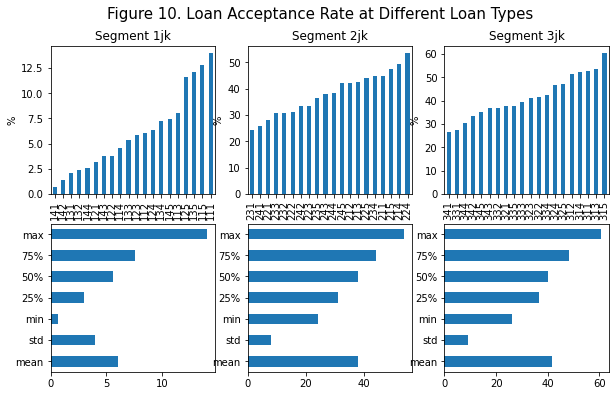

In [22]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(10, 6))

ax_list = [ax1, ax2, ax3, ax4, ax5, ax6]

for i in range(1, 4):
    ((100*df1.loc[((df1['segment']//100) == i) &
                 df1['Outcome']].groupby('segment').size()
         / df1.loc[(df1['segment']//100) == i].groupby('segment').size())
     .sort_values().plot(kind='bar', ax=ax_list[i-1]))

    ((100*df1.loc[((df1['segment']//100) == i) & 
                 df1['Outcome']].groupby('segment').size()
         / df1.loc[(df1['segment']//100) == i].groupby('segment').size())
     .describe().iloc[1:].plot(kind='barh', ax=ax_list[i+2]))
    ax_list[i-1].set_title(f'Segment {i}jk')
    ax_list[i-1].set_ylabel('%')
    
plt.suptitle('Figure 10. Loan Acceptance Rate at Different Loan Types',
             y=0.97, size=15);

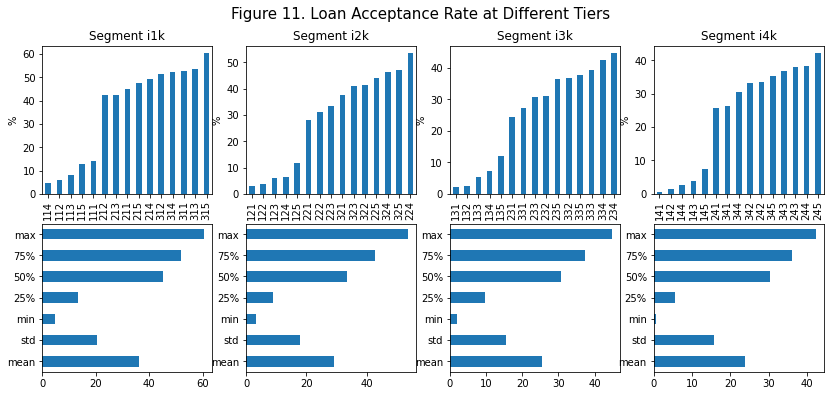

In [23]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2,4,
                                                            figsize=(14, 6))
ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

for i in range(1, 5):
    ((100*df1.loc[((df1['segment']%100)//10 == i) &
                  df1['Outcome']].groupby('segment').size()
         / df1.loc[(df1['segment']%100)//10 == i].groupby('segment').size())
     .sort_values().plot(kind='bar', ax=ax_list[i-1]))

    ((100*df1.loc[((df1['segment']%100)//10 == i) &
                  df1['Outcome']].groupby('segment').size()
         / df1.loc[(df1['segment']%100)//10 == i].groupby('segment').size())
     .describe().iloc[1:].plot(kind='barh', ax=ax_list[i+3]))

    ax_list[i-1].set_title(f'Segment i{i}k')
    ax_list[i-1].set_ylabel('%')
    
plt.suptitle('Figure 11. Loan Acceptance Rate at Different Tiers', y=0.97,
             size=15);

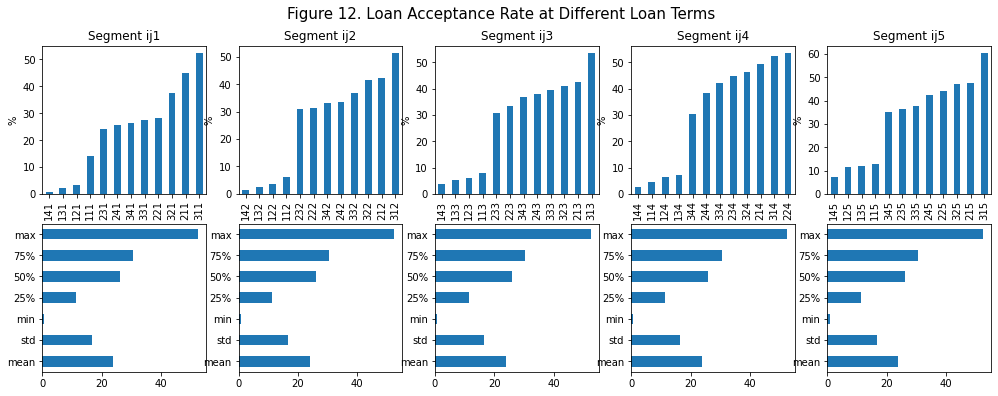

In [24]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2,
                                                           5, figsize=(17, 6))
ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

for i in range(1,  6):
    ((100*df1.loc[((df1['segment']%100)%10 == i) &
                  df1['Outcome']].groupby('segment').size()
         / df1.loc[(df1['segment']%100)%10 == i].groupby('segment').size())
     .sort_values().plot(kind='bar', ax=ax_list[i-1]))

    ((100*df1.loc[((df1['segment']%100)%10 == 1) &
                  df1['Outcome']].groupby('segment').size()
         / df1.loc[(df1['segment']%100)%10 == 1].groupby('segment').size())
     .describe().iloc[1:].plot(kind='barh', ax=ax_list[i+4]))

    ax_list[i-1].set_title(f'Segment ij{i}')
    ax_list[i-1].set_ylabel('%')
    
plt.suptitle('Figure 12. Loan Acceptance Rate at Different Loan Terms',
             y=0.97, size=15);

# Price Optimization by Segment

- How should we price the loans?
- Do you think you can recommend the right price to quote?
- Has there been a mis-pricing of APR quotes?
- Can we build a systematic approach that can scale with the number of segments given certain customer characteristics?

The primary objective of price optimization is to determine the optimum price for each segment using the data that were previously categorized. The objective function is to maximize the profit given the factors for each segment such as the current rate, previous rate, competitive rate, demand, and the risk involved.

In this study, an optimum price is defined as the interest rate that will maximize the overall profit. Overpricing a prospective loan decreases the probability that a customer will accept the loan, but it increases the profitability if the customer does accept. In contrast, underpricing a prospective loan increases the probability that a customer will accept the loan, but it may compromise profitability. Thus, the optimum loan prices that maximize the over-all profit can be found for each segment.

### Objective Function

The objective function [1] is given by 

$$
\begin{aligned}\max_r\,TR(r) &= \sum_i^{N=60} D_iF_i(r_i)PVNII(P_i, r_i, n_i) \end{aligned}
$$

where,<br>

$D_i$ = total demand per segment,<br>
$F_i$ = probability of accepting the loan per segment,<br>
$PVNII(P_i, r_i, n_i)$ = Present value of net interest income

subject to the constraint:
$$r_i\geq0$$

The present value of the net interest income is given by 

$$
\begin{aligned} PVNII(P, r, n) &= Pn(r-r_c)-(1-s_n)\times Pr\sum_{i=1}^n\frac{1-s_i}{1-s_n} \\ 
&= Pn(r-r_c)- PRD\times LGD\end{aligned}
$$

where,<br>

$r_c$ = cost of capital / funds<br>
$s_i$ = probability that a borrow will make payment $i$<br>
$PRD$ = probability of default<br>
$LGD$ = loss given default

### Non-Linear Optimization

Contrained minimization method COBYLA (Constrained Optimization By Linear Approximation) was used to solve the objective function. The algorithm fits for optimization with non-linear inequality and equality constraints [2]. It minimizes the objective function $F(X)$ subject to $M$ inequality constraints of the form $g(X)\geq0$ on $X$, where $X$ is a vector of $N$ dimensions. 

In this study, $r$ is a vector of interest rates of $N=60$ dimensions, where each dimension represents a unique pricing segment. The current interest rates were used as initial values. The only constraint imposed was $r\geq0$.

### Modeling the Bid-Response Function

A bid response function gives the probability of winning for every possible price response. Low prices gives higher probability of winning, while high prices decreases the chance. A customer bid response can modeled using a logit function or power function [3]. The logit  model applies even without knowledge on the competitor's pricing. In this study, the bid-response function, $F(r_i)$ was modeled using a bid-repsonse function of the form:

$$
F(r_i) = \frac{1}{1+e^{a+bX(r_i)}}
$$
where,<br>
$X(r_i)$ = is a measure of competitiveness of the offered APR $r_i$ [1] and defined by,<br>

$$
X(r_i) = (\text{Previous}_{APR} - \text{Offered}_{APR}) + (\text{Competitor}_{APR} - \text{Offered}_{APR})
$$

$F(r_i)$ was modeled by minimmizing SSE (Sum of Squared Residuals) for each segment.

In [25]:
D = df1.groupby('segment')['Rate'].count().tolist()
Present_r = df1.groupby('segment')['Rate'].mean().tolist()
Comp_r = df1.groupby('segment')['Competition rate'].mean().tolist()
Prev_r = df1.groupby('segment')['Previous Rate'].mean().tolist()
COF_r = df1.groupby('segment')['Cost of Funds'].mean().tolist()
Amount = df1.groupby('segment')['Amount'].mean().tolist()
Term = df1.groupby('segment')['Term'].mean().tolist()

In [26]:
def func(x, a, b):
    return 1/(1+np.e**(a + b*x))

fit, fit2 = [], []
for i, j in enumerate(sorted(segments)):
    df2 = df1[df1.segment==j]
    X = df2['Previous Rate']+df2['Competition rate']-2*df2['Rate']
    Y = df2['Outcome']
    popt, pcov = curve_fit(func, X, Y)
    fit.append(1/(1+np.e**(popt[0] + popt[1]*X.mean())))
    fit2.append(popt)
    
def F(r, i):
    X = Prev_r[i] + Comp_r[i] - 2*r
    return 1/(1+np.e**(fit2[i][0]+fit2[i][1]*X))

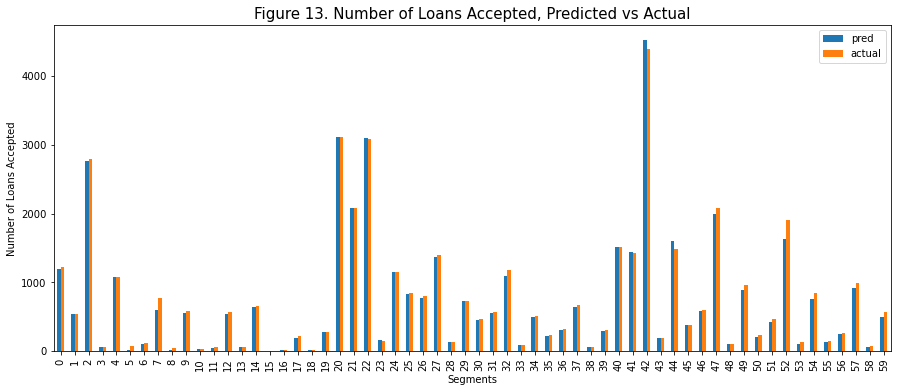

In [27]:
# Comparing function predictions and actual values.
pred = [D[i]*F(Present_r[i], i) for i in range(60)]
actual = df1[df1.Outcome == 1].groupby('segment')['Rate'].count().tolist()
pd.DataFrame({'pred':pred, 'actual':actual}).plot(kind='bar', figsize=(15, 6))
plt.ylabel('Number of Loans Accepted')
plt.xlabel('Segments')
plt.title('Figure 13. Number of Loans Accepted, Predicted vs Actual', size=15);

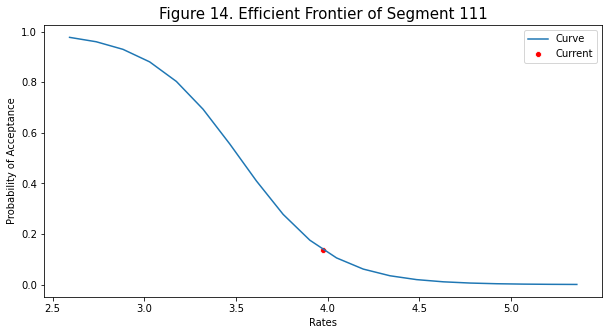

In [28]:
# Looking at the frontier for segment 111
rates = np.linspace(Present_r[0]-COF_r[0], Present_r[0]+COF_r[0], 20)
probabilities = [F(rate, 0) for rate in rates]

sns.lineplot(rates, probabilities, label='Curve')
sns.scatterplot(x=[Present_r[0]], y=F(Present_r[0], 0), color='r', label='Current')
plt.xlabel('Rates')
plt.ylabel('Probability of Acceptance')
plt.title('Figure 14. Efficient Frontier of Segment 111', size=15);

In [29]:
def objective(r):
    return -sum([D[i]*F(r[i], i)*PVNIII(r[i], i)
                 for i in range(60)])

def constraint1(r):
    return r

### Risk Free Loans

For a risk-free loan, $PRD=0$. Thus,
$$
PVNII(P,r,n) = Pn(r-r_c)
$$

The objective function is then given by,<br>

$$
\begin{aligned}\max_r\,TR(r) &= \sum_i^{N=60} D_iF_i(r_i)P_in_i(r_i-r_{c_i}) \end{aligned}
$$

The results are given below:

In [30]:
def PVNIII(r, i):
    return Amount[i]*Term[i]*(r-COF_r[i])

In [31]:
rates1 = minimize(objective, np.array(Present_r), method='COBYLA', tol=0.3,
                 constraints={'type': 'ineq', 'fun': constraint1},
                 options = {'maxiter': 10000})
print('Optimization conducted successfully = ', rates1.success)
print('Total Revenue = %i'%-rates1.fun)
print('Optimized Rates = ')
TR1 = objective(Present_r)

N, R, U = 'N', 'R', 'U'
arrays = [[N,N,N,N,R,R,R,R,U,U,U,U], [1,2,3,4,1,2,3,4,1,2,3,4]]
idx = pd.MultiIndex.from_arrays(arrays, names=('Car  Type', 'Tier'))
df3 = pd.DataFrame(rates1.x.reshape(12,5))
df3.set_index(idx, inplace=True)
df3.columns = ['36', '48', '60', '66', '72']
df3

Optimization conducted successfully =  True
Total Revenue = 498974363191
Optimized Rates = 


36    48    60     66    72
Car  Type Tier                               
N         1    3.071 2.589 2.563 16.730 3.211
          2    3.885 2.653 3.016  4.406 3.493
          3    7.312 2.801 3.414  7.099 4.261
          4    8.237 4.935 4.048  7.816 7.716
R         1    6.297 4.818 5.323  4.723 5.487
          2    4.288 4.857 4.982  6.556 5.614
          3    5.355 6.428 5.080  5.733 5.684
          4    6.821 6.812 7.355  7.502 6.629
U         1    3.745 4.191 4.301  4.923 5.096
          2    4.121 4.923 5.084  5.752 5.723
          3    4.995 5.664 5.532  6.372 5.994
          4    5.183 7.241 7.201  7.438 7.760

### Low-Risk Loans

All loans have a risk factor, that is the risk of default at a certain time period within the contract. This is modelled by the (Probability of Deafult)\*(Loss Given Default). 

Since there is no data available to estimate the associated risk for each segment, the above equation was modified and the risk probabilities were simulated using the products of equally-spaced scalars. Although the actual risk values may differ per segment, a logical risk was assigned with the highest probability assigned to the segment with the longest loan_term (i.e. $s_{ij5}$) and highest FICO score (i.e. Tier 4 segments, $s_{i4k}$). For the low-risk loan, the maximum risk assigned is 0.2, and the average risk across all segments is 0.06.

The objective function is then given by,

$$
\begin{aligned}\max_r\,TR(r) &= \sum_i^{N=60} D_iF_i(r_i)\left[P_in_i(r_i-r_{c_i})-P_ir_i{k_i}^2\right] \end{aligned}
$$

where $k_i$ is the computed array of risk probabilities, with the  values given below:

In [32]:
a = np.array([np.linspace(0.01,0.10, 4) for i in range(2)])
b = np.array([np.linspace(0.01,1, 5)])
k = np.array([np.einsum('ij,jk->jk', a, b) for i in range(3)]).ravel()
print('Risks:')
df3 = pd.DataFrame(k.reshape(12,5))
df3.set_index(idx, inplace=True)
df3.columns = ['36', '48', '60', '66', '72']
df3

Risks:


36    48    60    66    72
Car  Type Tier                              
N         1    0.000 0.005 0.010 0.015 0.020
          2    0.001 0.021 0.040 0.060 0.080
          3    0.001 0.036 0.071 0.105 0.140
          4    0.002 0.052 0.101 0.150 0.200
R         1    0.000 0.005 0.010 0.015 0.020
          2    0.001 0.021 0.040 0.060 0.080
          3    0.001 0.036 0.071 0.105 0.140
          4    0.002 0.052 0.101 0.150 0.200
U         1    0.000 0.005 0.010 0.015 0.020
          2    0.001 0.021 0.040 0.060 0.080
          3    0.001 0.036 0.071 0.105 0.140
          4    0.002 0.052 0.101 0.150 0.200

In [33]:
def PVNIII(r, i):
    return Amount[i]*Term[i]*(r-COF_r[i]) - Amount[i]*r*k[i]**2

In [34]:
rates2 = minimize(objective, np.array(Present_r), method='COBYLA', tol=0.3,
                 constraints={'type': 'ineq', 'fun': constraint1},
                 options = {'maxiter': 10000})
print('Optimization conducted successfully = ', rates2.success)
print('Total Revenue = %i'%-rates2.fun)
print('Optimized Rates = ')
TR2 = objective(Present_r)

df3 = pd.DataFrame(rates2.x.reshape(12,5))
df3.set_index(idx, inplace=True)
df3.columns = ['36', '48', '60', '66', '72']
df3

Optimization conducted successfully =  True
Total Revenue = 492785397050
Optimized Rates = 


36    48    60     66    72
Car  Type Tier                               
N         1    2.940 2.823 2.743 14.570 3.336
          2    3.884 2.773 2.979  4.424 3.479
          3    7.038 3.349 3.177  7.212 4.095
          4    8.450 4.991 4.111  9.463 7.752
R         1    7.193 4.604 5.063  4.955 5.789
          2    5.429 4.550 5.057  5.861 5.619
          3    5.257 6.954 4.850  6.523 5.793
          4    7.189 6.968 7.141  8.193 7.371
U         1    3.780 4.238 4.297  4.884 5.064
          2    5.044 4.813 5.129  5.059 5.616
          3    4.767 5.342 5.537  5.553 5.948
          4    6.044 7.873 7.125  7.078 7.617

### High-Risk Loans

The case when the firm is operating with a higher risk was considered. The risk probabilities were still simulated using the products of equally-spaced scalars, with the highest probability assigned to the segment with the longest loan_term and highest FICO score. For this case, the maximum risk assigned is **0.4**, and the average risk acrosss all segment is **0.15**, which is **twice** than the low-risk loan. Figure N.n shows the density plots of the computed risk probabilities for both low and high risk loans. The probabilities for the high-risk loan are more spread through a wider range of higher values.

The objective function is the same as the low-risk loan, except for the newly-computed values of $k_i$. The results of optimization are given below.

In [35]:
a = np.array([np.linspace(0.1,0.2, 4) for i in range(2)])
b = np.array([np.linspace(0.01,1, 5)])
k = np.array([np.einsum('ij,jk->jk', a, b) for i in range(3)]).ravel()

rates3 = minimize(objective, np.array(Present_r), method='COBYLA', tol=0.3,
                 constraints={'type': 'ineq', 'fun': constraint1},
                 options = {'maxiter': 10000})

print('Optimization conducted successfully = ', rates3.success)
print('Total Revenue = %i'%-rates3.fun)
print('Optimized Rates = ')
TR3 = objective(Present_r)
df3 = pd.DataFrame(rates3.x.reshape(12,5))
df3.set_index(idx, inplace=True)
df3.columns = ['36', '48', '60', '66', '72']
df3

Optimization conducted successfully =  True
Total Revenue = 497707282696
Optimized Rates = 


36    48    60     66    72
Car  Type Tier                               
N         1    3.115 2.623 2.609 16.654 3.232
          2    3.824 2.490 3.070  4.470 3.350
          3    9.921 4.325 3.374  7.618 3.932
          4    8.774 5.034 4.042  8.524 7.109
R         1    6.095 5.033 5.453  4.265 5.500
          2    5.905 3.985 5.341  6.717 5.721
          3    4.936 6.899 5.022  6.581 5.792
          4    5.714 6.443 6.288  5.868 7.051
U         1    3.971 4.041 4.252  4.866 5.185
          2    3.888 4.806 5.180  5.271 5.685
          3    4.884 5.303 5.496  5.803 6.040
          4    6.494 7.297 7.149  7.683 7.619

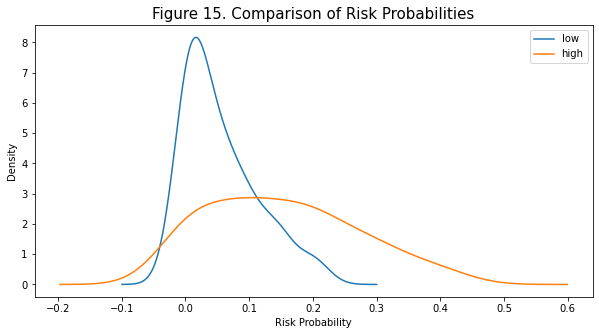

In [36]:
a = np.array([np.linspace(0.01,0.10, 4) for i in range(2)])
b = np.array([np.linspace(0.01,1, 5)])
k_low = np.array([np.einsum('ij,jk->jk', a, b) for i in range(3)]).ravel()
a = np.array([np.linspace(0.1,0.2, 4) for i in range(2)])
b = np.array([np.linspace(0.01,1, 5)])
k_high = np.array([np.einsum('ij,jk->jk', a, b) for i in range(3)]).ravel()
d = pd.DataFrame([k_low, k_high]).T
d.columns = ['low', 'high']
d.plot(kind='density')
plt.xlabel('Risk Probability')
plt.title('Figure 15. Comparison of Risk Probabilities', size=15);

## Comparison of Results

Figure 16 shows the comparison of the current and optimized rates for segments. In most segments, the optimum rate is slightly below the current rate. This means that in those segments, the firm can still increase profitability by offering lower APR to increase the probability of winning.

In segments where the optimum rate is higher than the current rate, offering a slightly higher APR will increase the profit, and the corresponding incremental reduction in the probability of winning is being offset by higher profitability.

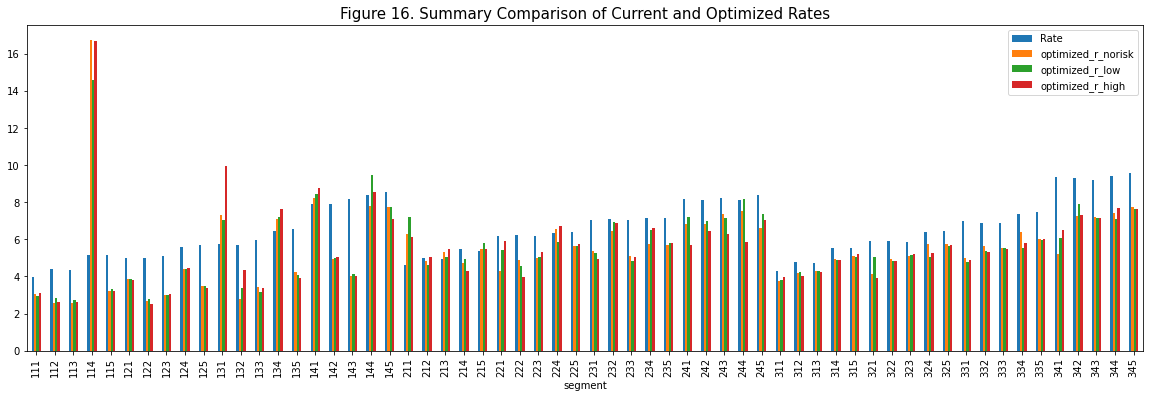

In [37]:
low_high = df1.groupby('segment')['Rate'].mean().to_frame()
low_high['optimized_r_norisk'] = rates1.x
low_high['optimized_r_low'] = rates2.x
low_high['optimized_r_high'] = rates3.x
low_high.plot(kind='bar', figsize=(20,6))
plt.title('Figure 16. Summary Comparison of Current and Optimized Rates',
          size=15);

### Comparison of Profit

The profit equation was used to calculate the present and potential revenue given the current and optimum APRs, respectively. The amounts computed are based on the simulated risk probabilities and fitted customer bid-response function which might differ in actuality for a specific segment. 

The highest profit obtained using the present rate was **256,430,864,188.35**, under the risk-free condition. The calculated profit for the low and high-risk cases are just 0.01% lower than the profit calculated in the risk-free case.

The potential profit calculated using the optimum rates are given in the second row of the table. For all three conditions, the potential profit obtained using the optimum rates is twice as large as the current profit. The highest potential profit is obtained in the risk-free condition, amounting to **496,840,870,620.74**. The potential profit obtained under low and high-risk conditions are just **~1%** lower than the amount computed under the risk-free condition.

In [38]:
pd.DataFrame({'Present Rates':[-TR1, -TR2, -TR3],
              'Optimized Rates':[-rates1.fun, -rates2.fun, -rates3.fun]},
             index=['Risk Free', 'Low Risk', 'High Risk']).T

,Risk Free,Low Risk,High Risk
Present Rates,"256,430,864,687.577","256,403,054,795.960","256,241,318,403.145"
Optimized Rates,"498,974,363,191.395","492,785,397,050.117","497,707,282,696.248"


### Breakdown of Profit

Under No-Risk case, segment $1jk$ (loan_type 1-New) will have the largest increase in profit (**300%** increase) if APR will be offered at the optimum rates. This is because of the fact that this segment has the lowest loan acceptance rate of only **6%**, and thus, offering the optimum APR which is lower than the current rate for most segments under $s_{1jk}$, will increase the probability of winning the customer. This only means that lowering the current APR by **1-2%** would be offset largely by the profit gained from having more loans accepted. For segments $2jk$ (loan-type **2-Refinanced**), the optimum profit is almost equal to the present estimate. As obsered, the optimum interest rates calculated under $s_{2jk}$ are close to the present rates. This means that some of the present rates under these segments are near optimum. 

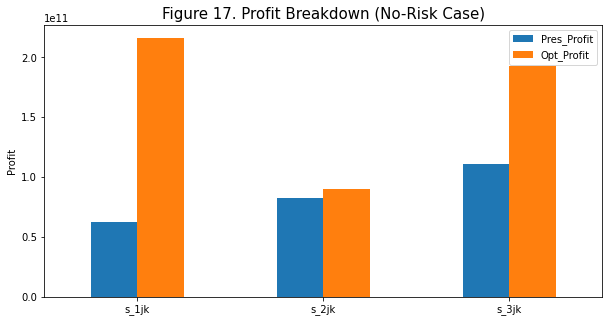

In [39]:
def objective_0(r, n, m):
    return sum([D[i]*F(r[i], i)*Amount[i]*Term[i]*(r[i]-COF_r[i])
                 for i in range(n, m)])

## s_1jk Profit
pres_prof_s1jk = objective_0(Present_r, 0, 20)
opt_prof_s1jk = objective_0(rates1.x, 0, 20)

## s_2jk Profit
pres_prof_s2jk = objective_0(Present_r, 20, 40)
opt_prof_s2jk = objective_0(rates1.x, 20, 40)

## s_3jk Profit
pres_prof_s3jk = objective_0(Present_r, 40, 60)
opt_prof_s3jk = objective_0(rates1.x, 40, 60)

col1 = [pres_prof_s1jk, pres_prof_s2jk, pres_prof_s3jk]
col2 = [opt_prof_s1jk, opt_prof_s2jk, opt_prof_s3jk]

df2 = pd.DataFrame({'Pres_Profit': col1,
             'Opt_Profit': col2})
df2.index = ['s_1jk', 's_2jk', 's_3jk']

df2.plot(kind='bar')
plt.ylabel('Profit')
plt.title('Figure 17. Profit Breakdown (No-Risk Case)', size=15)
plt.xticks(rotation='horizontal');

# Recommendation

The authors would like to recommend to include the actual data of default payments for the estimation of the actual risk probabilities. The simulated risk probabilities assumes that the probability of default payment linearly increases with FICO score and loan term. However, actual risks may not be linear and vary across different loan type. The optimum rates should account for the risk probabilities as it affects the overall profit. Higher APR also increases the loss due to default payment, and thus pulls-down the profit.

The optimum rate calculated for the Segment 114 is very high at 14% compared to its present rate at 5%. This may be occuring due one of two reasons. The first is that the curve fitting of the given data showing that a higher rate would indeed have a higher probability of winning, or that this curve fitting is erroraneous. In this segment and similar ones, the authors would like to recommend that the behaviour be rechecked and either the current rate or competitive rate for that segment be used in the meantime.

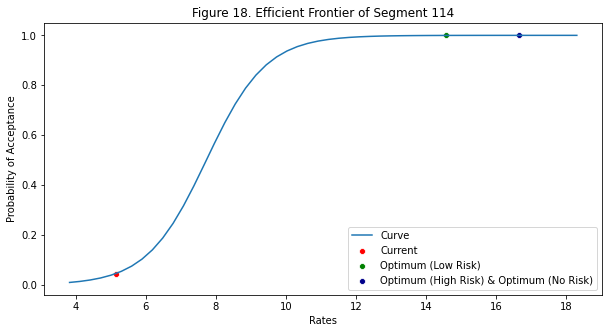

In [40]:
# Looking at the frontier for segment 114
i = 3
rates = np.linspace(Present_r[i]-COF_r[i], Present_r[i]+10*COF_r[i], 50)
probabilities = [F(rate, i) for rate in rates]

figure=plt.figure(figsize=(10,5))
sns.lineplot(rates, probabilities, label='Curve')
sns.scatterplot(x=[Present_r[i]], y=F(Present_r[i], i), color='r',
                label='Current')
sns.scatterplot(x=[rates2.x[i]], y=F(rates2.x[i], i), color='g',
                label='Optimum (Low Risk)')
sns.scatterplot(x=[rates3.x[i]], y=F(rates3.x[i], i), color='darkblue',
                label='Optimum (High Risk) & Optimum (No Risk)')
plt.xlabel('Rates')
plt.ylabel('Probability of Acceptance')
plt.title('Figure 18. Efficient Frontier of Segment 114');

The model can run for a higher number of segments as well with modifications in certain areas. For example, it was noticed that the Tiers assigned to the customers have overlapping FICO scores. To solve this, new tiers were made by splitting the range into 5 equal bins. This increased the number of segments from 60 to 75. While making these additional segments however, the number of points in each segment should be more than 1 but ideally, the more data points, the better the curve fit for predicting the behavior.

In [41]:
# Adding Segments
tier = []
for i in df.FICO:
    if (i >= 587) & (i <= 641):
        j = 1
    if (i >= 642) & (i <= 695):
        j = 2
    if (i >= 696) & (i <= 749):
        j = 3
    if (i >= 750) & (i <= 803):
        j = 4
    if (i >= 804) & (i <= 854):
        j = 5
    tier.append(j)
    
df1 = df.copy()
df1['tier'] = tier

loan_num = {'N':1, 'R':2, 'U':3}
df1['loan_num'] = [loan_num[i] for i in df1['Car  Type']]
term_num = {36:1, 48:2, 60:3, 66:4, 72:5}
df1['term_num'] = [term_num[i] for i in df1['Term']]
df1['segment'] = df1['tier']*10 + df1['loan_num']*100 + df1['term_num']*1
df1.drop(columns=['loan_num', 'term_num'], inplace=True)
segments = df1.segment.unique()

D = df1.groupby('segment')['Rate'].count().tolist()
Present_r = df1.groupby('segment')['Rate'].mean().tolist()
Comp_r = df1.groupby('segment')['Competition rate'].mean().tolist()
Prev_r = df1.groupby('segment')['Previous Rate'].mean().tolist()
COF_r = df1.groupby('segment')['Cost of Funds'].mean().tolist()
Amount = df1.groupby('segment')['Amount'].mean().tolist()
Term = df1.groupby('segment')['Term'].mean().tolist()

def func(x, a, b):
    return 1/(1+np.e**(a + b*x))

fit = []
for i, j in enumerate(sorted(segments)):
    df2 = df1[df1.segment==j]
    X = df2['Previous Rate']+df2['Competition rate']-2*df2['Rate']
    Y = df2['Outcome']
    popt, pcov = curve_fit(func, X, Y)
    fit.append(popt)
    
def F(r, i):
    X = Prev_r[i] + Comp_r[i] - 2*r
    return 1/(1+np.e**(fit[i][0]+fit[i][1]*X))

def objective(r):
    return -sum([D[i]*F(r[i], i)*PVNIII(r[i], i)
                 for i in range(75)])
def PVNIII(r, i):
    return Amount[i]*Term[i]*(r-COF_r[i])

def constraint1(r):
    return r

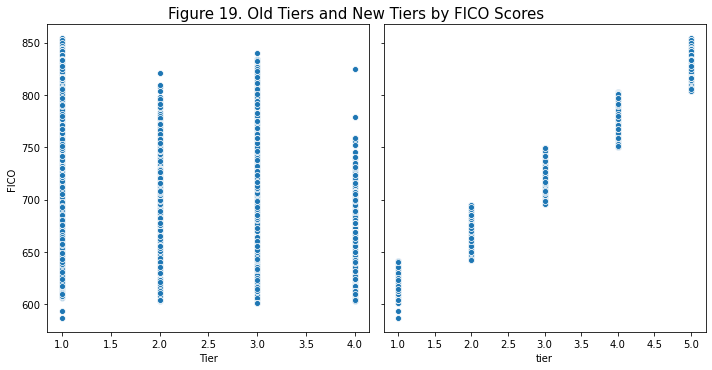

In [42]:
fig, ax = plt.subplots(1, 2, sharey=True)
sns.scatterplot(df1.Tier, df1.FICO, ax=ax[0])
sns.scatterplot(df1.tier, df1.FICO, ax=ax[1])
fig.tight_layout()
plt.suptitle('Figure 19. Old Tiers and New Tiers by FICO Scores', size=15,
             y=1.02);

In [43]:
rates4 = minimize(objective, np.array(Present_r), method='COBYLA', tol=0.3,
                 constraints={'type': 'ineq', 'fun': constraint1},
                 options = {'maxiter': 10000})
print('Optimization conducted successfully = ', rates4.success)
print('Total Revenue = %i'%-rates4.fun)
print('Optimized Rates =')

df3 = pd.DataFrame(rates4.x.reshape(15,5))
N, R, U = 'N', 'R', 'U'
arrays = [[N,N,N,N,N,R,R,R,R,R,U,U,U,U,U], [1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]]
idx = pd.MultiIndex.from_arrays(arrays, names=('Car  Type', 'Tier'))
df3.set_index(idx, inplace=True)
df3.columns = ['36', '48', '60', '66', '72']
df3

Optimization conducted successfully =  True
Total Revenue = 476870856217
Optimized Rates =


36    48    60     66    72
Car  Type Tier                               
N         1    8.768 6.385 9.339  7.486 5.988
          2    6.492 7.523 3.431  6.756 4.273
          3    3.230 2.724 2.869  3.453 3.449
          4    3.075 2.472 2.728 13.255 3.266
          5    3.108 4.901 3.109  8.702 4.380
R         1    6.414 8.221 6.746  6.744 7.067
          2    5.182 5.633 5.743  5.974 6.184
          3    5.111 4.670 4.802  6.208 5.517
          4    6.991 5.277 4.743  6.813 4.385
          5    5.559 4.097 3.905  7.818 3.816
U         1    8.640 8.527 7.894 10.754 6.785
          2    5.621 6.095 5.875  6.502 6.545
          3    4.221 4.541 4.590  5.380 5.279
          4    4.003 4.177 4.205  4.956 5.227
          5    2.221 3.701 4.241  4.589 5.168

It can be seen that adding more segments may not always be a good option. More trials need to be conducted to identify the optimal number of segments to study.

In [44]:
pd.DataFrame({'Present Rates':[-TR1, -objective(Present_r)],
              'Optimized Rates':[-rates1.fun, -rates4.fun]},
             index=['60 Segments', '75 Segments']).T

,60 Segments,75 Segments
Present Rates,"256,430,864,687.577","259,713,544,417.498"
Optimized Rates,"498,974,363,191.395","476,870,856,217.055"


# Conclusion
In this study, the optimum rates for different risk types were calculated and the potential profit were estimated based on the optimum rates. Based on the estimate, the firm can almost double its current profit by offering the optimum APRs for each segment. In most cases, the optimum APR is lower than the current rate. This means that the firm can earn more profit by increasing its probability of winning, especially for segment $1jk$ (i.e. loan_type **1-New**), where the average loan acceptance rate is only **6%**, which is very low compared to acceptance rate of segments under loan_type **2-Refinanced** and **3-Used** which is around 40%. The breakdown of profit also showed that optimizing the APRs in this segment will increase its profit by **300%**.

Based on the profit breakdown analysis, some of the present interest rates under segment $s_{2jk}$ (loan_type **2-Refinanced**) are already near the optimum. Thus, revising the APRs in these segments must be done graduallly so that current profit under these segments is maintained or improved. 

# References

[1] Phillips, Robert. (2013). Optimizing prices for consumer credit. Journal of Revenue & Pricing Management. Vol 12. DOI: 10.1057/rpm.2013.9. <br>
[2] Villate, Jaime. (October 14, 2014). Maxima Manual: 37. Cobyla. Retrieved from http://maxima.sourceforge.net/docs/manual/de/maxima_37.html<br>
[3] Agrawal, V & Ferguson, M. (June 2007). Bid-Response Models for Customized Pricing. Retrieved from https://pdfs.semanticscholar.org/240f/8ebc74c9fdb0c5a0ff0f424d32391b556b19.pdf